### Data Description

The dataset consists of 5 Features

1. Temperature:
Oil Temperature in celsius

2. Rs: 
Solution gas to Oil Ratio which is a general term for the amount of gas dissolved in the oil.

3. Gas Gravity:
Gas Gravity is the ratio of the density of the gas at standard pressure and temperature to the density of air at the same standard pressure and temperature

3. Oil API: 
The grade of the crude oil

4. Pbp: 
Pressure Bubble Point "The pressure at which the first bubble of  gas is formed within the liquid oil phase. As pressure falls below the bubble point more gas is liberated from oil and single liquid phase becomes 2 phases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('PVT Data.csv')

In [3]:
data.describe()

,Temperature,Rs,Gas Gravity,Oil API,Pbp
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,147.796271,411.145756,1.012870,31.658760,1424.602150
std,41.936641,291.829082,0.162192,5.036067,908.669973
min,70.447234,27.832416,0.797048,17.854225,131.484967
25%,116.365357,183.034832,0.885612,28.469070,697.772696
50%,142.257643,348.735793,0.978741,32.604282,1252.802615
75%,176.074354,587.055416,1.113760,35.875571,1937.635034
max,282.911419,1471.094081,1.632588,39.714096,4306.643567


### Objectives

Statistical regression techniques are mainly used to derive empirical correlations for different PVT properties, besides statistical regression techniques, it is also possible to use neural networks to develop correlations between PVT properties. In this project I will use Neural Networks to estimate the correlations between PVT Properties and compare it to the analytical solution.

In [4]:
## Dividing our dataset into inputs and outputs

X = pd.DataFrame(data = data.iloc[:,0:4])
y = pd.DataFrame(data = data.iloc[:,4])

In [5]:
y2 = data.iloc[:,4]

In [6]:
## Getting the names of the columns

X_feature_columns = X.columns
y_feature_columns = y.columns

In [9]:
## Scaling our dataset to be ready for the neural networks

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
Xnorm = pd.DataFrame(data = scaler1.fit_transform(X), columns=X_feature_columns)
ynorm = pd.DataFrame(data = scaler2.fit_transform(y), columns=y_feature_columns)

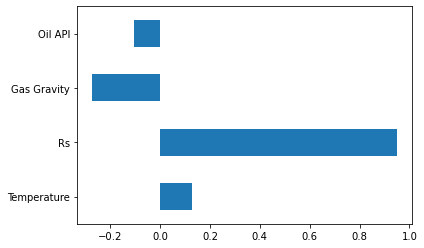

In [10]:
'''
Feature Ranking using Random Forest and Spearmans correlation to see the 
impact of different input parameters on the output parameter "Pbp" 
PRESSURE BUBBLE POINT.
'''

from scipy import stats
datanorm = scaler.fit_transform(data)
rho, pval = stats.spearmanr(datanorm)
corr = pd.Series(rho[:4,4], index = X.columns)
corr.plot(kind='barh')
plt.show()

<ipython-input-11-6bcb04ff492e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


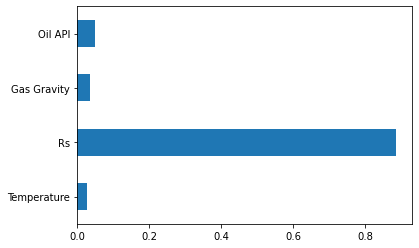

In [11]:
## Using Random Forest to Check the importance of input features

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10, random_state=0)
model.fit(X, y)
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.plot(kind='barh')
plt.show()

### 3 Deep Learning Models

In [12]:
## Splitting the data into train and test sets

seed = 50
np.random.seed(seed)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnorm, ynorm, test_size = 0.3)

In [13]:
## Neural Network setup using 7 input layers only and tanh, lbfgs

from sklearn.neural_network import MLPRegressor
np.random.seed(seed)

nn_model_1 = MLPRegressor(hidden_layer_sizes=(7),
                       activation = 'tanh',
                       solver = 'lbfgs',
                       alpha = 1,
                       learning_rate_init=0.1,
                       max_iter=2000,
                       random_state=None,
                       tol = 0.01)

y_train_flat = y_train.values.ravel()
nn_model_1.fit(X_train, y_train_flat)

## Predicting the Pbp values using the nn_model_1
Pbp_test_prediction_1 =nn_model_1.predict(X_test)
Pbp_train_prediction_1 = nn_model_1.predict(X_train)

## Inverse transforming the predictions
Pbp_test_prediction_1 = Pbp_test_prediction_1.reshape(-1,1)
Pbp_train_prediction_1 = Pbp_train_prediction_1.reshape(-1,1)

Pbp_test_prediction_1 = scaler2.inverse_transform(Pbp_test_prediction_1)
Pbp_train_prediction_1 = scaler2.inverse_transform(Pbp_train_prediction_1)

In [14]:
## Neural Network setup using 7 input layers and 5 hidden layers

np.random.seed(seed)

nn_model_2 = MLPRegressor(hidden_layer_sizes=(7,5),
                       activation = 'tanh',
                       solver = 'lbfgs',
                       alpha = 1,
                       learning_rate_init=0.1,
                       max_iter=2000,
                       random_state=None,
                       tol = 0.01)

y_train_flat = y_train.values.ravel()
nn_model_2.fit(X_train, y_train_flat)

## Predicting the Pbp values using the nn_model_2
Pbp_test_prediction_2 =nn_model_2.predict(X_test)
Pbp_train_prediction_2 = nn_model_2.predict(X_train)

## Inverse transforming the predictions
Pbp_test_prediction_2 = Pbp_test_prediction_2.reshape(-1,1)
Pbp_train_prediction_2 = Pbp_train_prediction_2.reshape(-1,1)

Pbp_test_prediction_2 = scaler2.inverse_transform(Pbp_test_prediction_2)
Pbp_train_prediction_2 = scaler2.inverse_transform(Pbp_train_prediction_2)

In [15]:
## Neural Network setup using 7 input layers and 5 hidden layers with logistic activation function

np.random.seed(seed)

nn_model_3 = MLPRegressor(hidden_layer_sizes=(7,5),
                       activation = 'relu',
                       solver = 'lbfgs',
                       alpha = 1,
                       learning_rate_init=0.1,
                       max_iter=2000,
                       random_state=None,
                       tol = 0.01)

y_train_flat = y_train.values.ravel()
nn_model_3.fit(X_train, y_train_flat)

## Predicting the Pbp values using the nn_model_3
Pbp_test_prediction_3 =nn_model_3.predict(X_test)
Pbp_train_prediction_3 = nn_model_3.predict(X_train)

## Inverse transforming the predictions
Pbp_test_prediction_3 = Pbp_test_prediction_3.reshape(-1,1)
Pbp_train_prediction_3 = Pbp_train_prediction_3.reshape(-1,1)

Pbp_test_prediction_3 = scaler2.inverse_transform(Pbp_test_prediction_3)
Pbp_train_prediction_3 = scaler2.inverse_transform(Pbp_train_prediction_3)

In [16]:
## Actual Pbp test and train values
Pbp_test = scaler2.inverse_transform(y_test)
Pbp_train = scaler2.inverse_transform(y_train)

In [18]:
## R2 Scores for each neural network model 1, 2 and 3
from sklearn.metrics import r2_score

r2_test_1 = r2_score(Pbp_test, Pbp_test_prediction_1)
r2_test_2 = r2_score(Pbp_test, Pbp_test_prediction_2)
r2_test_3 = r2_score(Pbp_test, Pbp_test_prediction_3)

print(f'R2 Score for the Neural Network model 1 is {r2_test_1}')
print(f'R2 Score for the Neural Network model 2 is {r2_test_2}')
print(f'R2 Score for the Neural Network model 3 is {r2_test_3}')

R2 Score for the Neural Network model 1 is 0.8995558148359026
R2 Score for the Neural Network model 2 is 0.9098509823158558
R2 Score for the Neural Network model 3 is 0.8785516249055134


Text(0.5, 0, 'Pbp_test_prediction_3')

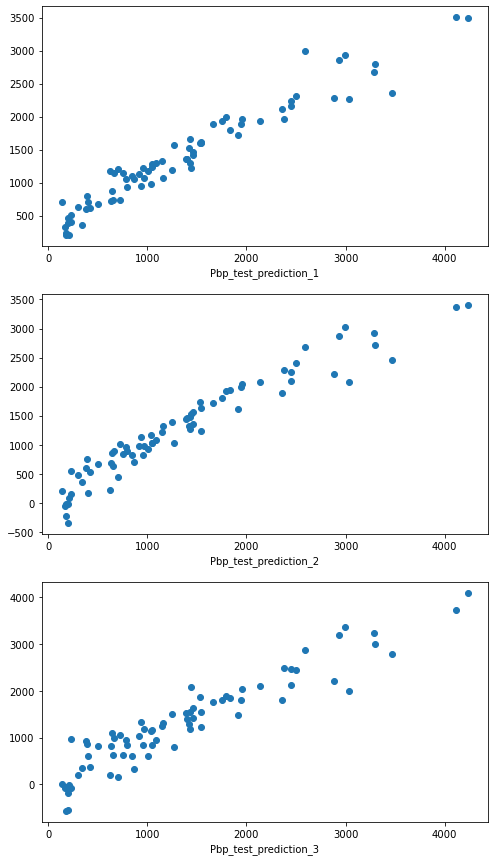

In [19]:
fig, ax = plt.subplots(3, 1, figsize = (8,15))
ax[0].scatter(Pbp_test, Pbp_test_prediction_1)
ax[0].set_xlabel('Pbp_test_prediction_1')
ax[1].scatter(Pbp_test, Pbp_test_prediction_2)
ax[1].set_xlabel('Pbp_test_prediction_2')
ax[2].scatter(Pbp_test, Pbp_test_prediction_3)
ax[2].set_xlabel('Pbp_test_prediction_3')

### Comparing the Solutions obtained from the neural network with the "Marhoun correlation" 

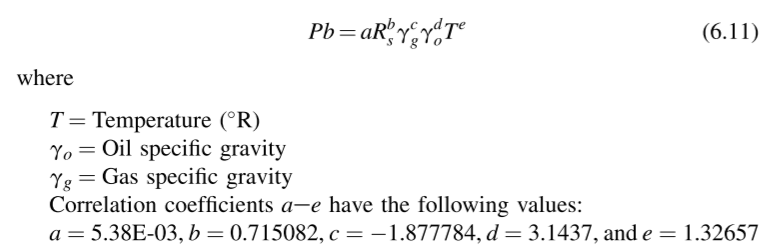

In [21]:
'''
To use the Marhoun correlation we have to do the following:
    1. Temperature unit converted from F to R by adding 460 to F
    2. Oil API should be converted to oil specific gravity using the
        following formula --> gamma = 145/(API + 135)
'''

## Converting the units of Temperature and Oil API
DatasetTempGamma = data.copy()
DatasetTempGamma['Temperature'] += 460
DatasetTempGamma['Oil API']=145/(DatasetTempGamma['Oil API'] + 135)

## Calculating the Pbp using the Marhoun Correlation
Pbp_Marhoun = 0.00538088 * (pow(DatasetTempGamma['Rs'], 0.715082))*\
    (pow(DatasetTempGamma['Gas Gravity'], -1.877784))*\
    (pow(DatasetTempGamma['Oil API'], 3.1437))*\
    (pow(DatasetTempGamma['Temperature'], 1.32657))

## Calculating the Pbp using the 2nd Neural Network model
Pbp_NN = nn_model_2.predict(Xnorm)

Pbp_NN = Pbp_NN.reshape(-1, 1)

Pbp_NN = scaler2.inverse_transform(Pbp_NN)

The r2 score for the Neural Network is 0.9198075432299188
The r2 score for the Marhoun correlation is 0.8668003939816404




Text(2000, 4000, 'R2 = 0.8668')

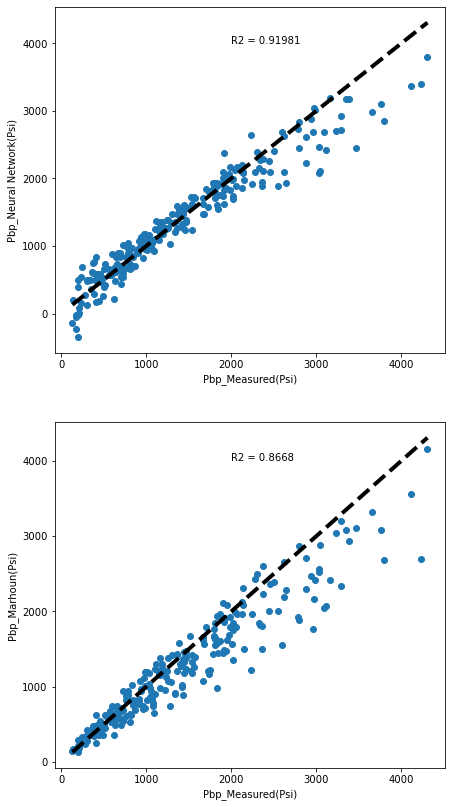

In [22]:
## Comparing the results from the Neural Network with the Marhoun correlation

# Calculating the r2 scores for the Neural Network and the Marhoun
r2_NN = r2_score(data['Pbp'], Pbp_NN)
r2_Marhoun = r2_score(data['Pbp'], Pbp_Marhoun)

print(f'The r2 score for the Neural Network is {r2_NN}\nThe r2 score for the Marhoun correlation is {r2_Marhoun}\n\n')

_, ax = plt.subplots(2, 1, figsize = (7, 14))
ax[0].scatter(data['Pbp'], Pbp_NN)
ax[0].set_xlabel('Pbp_Measured(Psi)')
ax[0].set_ylabel('Pbp_Neural Network(Psi)')
ax[0].plot([data['Pbp'].min(), data['Pbp'].max()],[data['Pbp'].min(), data['Pbp'].max()], 'k--', lw=4)
ax[0].text(2000, 4000, f"R2 = {round(r2_NN, 5)}")

ax[1].scatter(data['Pbp'], Pbp_Marhoun)
ax[1].set_xlabel('Pbp_Measured(Psi)')
ax[1].set_ylabel('Pbp_Marhoun(Psi)')
ax[1].plot([data['Pbp'].min(), data['Pbp'].max()],[data['Pbp'].min(), data['Pbp'].max()], 'k--', lw=4)
ax[1].text(2000, 4000, f"R2 = {round(r2_Marhoun, 5)}")

### Key Findings

We can find that the Neural Network with a hidden layer and tanh activation function obtained the best R2 Score of 0.91 and obtained better results compared to the Marhoun Correlation

### Flaws and Next Steps

In terms of Flaws, I think the dataset is relatively small, getting more data will indeed be beneficial and result in a more accurate model

Next steps: 
Gaining more data samples can increase the accuracy as well as getting more features for example "liquid drop out" can be beneficial to determine more accurate correlation between the features 